In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import yt

import sys
sys.path.append("../src")
from load_derived_FLASH_fields import derive_fields

plot_path = Path("~/shared/data/VAC_DEREK3D_20um/MagShockZ_hdf5_chk_0028")
ds = derive_fields(plot_path)

yt : [INFO     ] 2025-02-04 17:51:02,875 Particle file found: MagShockZ_hdf5_chk_0028
yt : [INFO     ] 2025-02-04 17:51:03,003 Parameters: current_time              = 1.0532564210672338e-08
yt : [INFO     ] 2025-02-04 17:51:03,004 Parameters: domain_dimensions         = [384 496 384]
yt : [INFO     ] 2025-02-04 17:51:03,004 Parameters: domain_left_edge          = [-0.8   -0.075 -0.8  ]
yt : [INFO     ] 2025-02-04 17:51:03,004 Parameters: domain_right_edge         = [0.8 2.  0.8]
yt : [INFO     ] 2025-02-04 17:51:03,004 Parameters: cosmological_simulation   = 0


In [3]:
yt.SlicePlot(ds, "z", "density", origin="native");

yt : [INFO     ] 2025-02-04 16:15:43,502 xlim = -0.800000 0.800000
yt : [INFO     ] 2025-02-04 16:15:43,503 ylim = -0.075000 2.000000
yt : [INFO     ] 2025-02-04 16:15:43,504 xlim = -0.800000 0.800000
yt : [INFO     ] 2025-02-04 16:15:43,504 ylim = -0.075000 2.000000
yt : [INFO     ] 2025-02-04 16:15:43,504 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


In [16]:
level = 0
dims = ds.domain_dimensions * ds.refine_by**level

# We construct an object that describes the data region and structure we want
# In this case, we want all data up to the maximum "level" of refinement
# across the entire simulation volume.  Higher levels than this will not
# contribute to our covering grid.
all_data = ds.covering_grid(
    level,
    left_edge=ds.domain_left_edge,
    dims=dims,
    # And any fields to preload (this is optional!)
)

In [20]:
edens = all_data["edens"]
edens_sampled = edens[::3, ::3, ::3]

In [ ]:
np.save("edens.npy", edens_sampled)

In [15]:
edens.size
# plt.imshow(edens[:, :, edens.shape[2]//2])
# plt.colorbar()

73138176

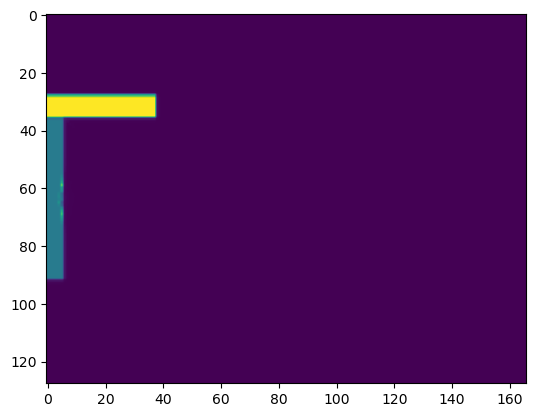